In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from datetime import datetime
%matplotlib inline

df = pd.read_csv("./Worlds_MainEvent_2024.csv", sep=';')

# Team Win Rate vs Game Length
Using win rates based on game length to determine if a team is an "early game" or "late game" oriented team. In a perfect scenario, this should also determine which champs teams pick based on their game style.


In [58]:
df_wr_length = df.filter(items=['Team','Opponent Team','Time','Outcome']).sort_values(by=['Team']).copy()
df_wr_length.loc[df_wr_length.Outcome == 'Win', 'Outcome'] = 1 
df_wr_length.loc[df_wr_length.Outcome == 'Loss', 'Outcome'] = 0

# Drop duplicates (4 duplicates per team)
df_wr_length.drop_duplicates(inplace=True)

In [59]:
""" Functions for the team win rate vs game length graph feature """

def convertTimeToFrame(time: object) -> int:

    # Convert time object to int minutes
    time = datetime.strptime(str(time), "%H:%M:%S")
    minutes = time.minute + time.second / 60.0

    # Return corresponding timeframe based on minutes
    timeframe_ranges = [(15, 1), (20, 2), (25, 3), (30, 4), (35, 5), (40, 6)]

    for threshold, timeframe in timeframe_ranges:
        if minutes <= threshold:
            return timeframe
        
    # Return timeframe 7 if minutes greater than 40+
    return 7

def calculateWinRate(timeframe):

    total = len(timeframe)

    # Create new dataframe to count number of wins, then find size
    wins = timeframe[timeframe['Outcome'] == 1].shape[0]

    win_rate = (wins / total) * 100
    
    return win_rate

def createTeamPlot(group): 

    team = df_wr_length[(df_wr_length['Team'] == group.name)].copy()

    # Create new column "Time Frame" based on column "Time" value
    team['Time Frame'] = team['Time'].apply(convertTimeToFrame)

    # Calculate team win rate based on time frame
    team_wr_length = team.groupby('Time Frame').apply(calculateWinRate, include_groups = False)

    # Add to line graph
    plt.plot(team_wr_length, label=group.name)

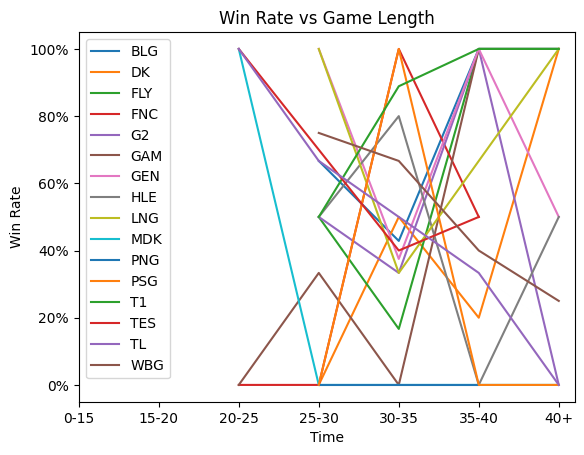

In [60]:
df_wr_length.groupby('Team').apply(createTeamPlot, include_groups = False)

plt.title("Win Rate vs Game Length")
plt.xlabel("Time")
plt.ylabel("Win Rate")
plt.xticks([1, 2, 3, 4, 5, 6, 7], ["0-15", "15-20", "20-25", "25-30", "30-35", "35-40", "40+"])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()
plt.show()